In [21]:
# Importing libraries
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("/content/IGRA_derived.csv")

In [3]:
df = df.rename(columns={'Unnamed: 0':'date'})
df['date'] = pd.to_datetime(df.date)
df['month']= df.date.dt.month

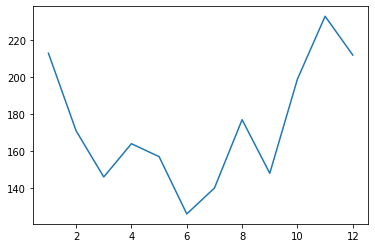

In [4]:
df.month.value_counts().sort_index().plot()

In [5]:
y=df['rained']
X = df.iloc[:,1:]
X=X.drop(columns=['rained'])

In [6]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=df[['rained', 'month']],random_state=123)

In [7]:
# Transforming features using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [8]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['month'])
df=pd.DataFrame(data=one_hot_encoded_data)
df

,date,Seasonality,Lower level humidity,Mid level humidity,U-wind at lower and mid levels,V-wind at lower and mid levels,Convective Condensation Level - thermodynamics,Total Precipitable Water - thermodynamics,rained,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2008-01-07,175.0,86.499196,57.931008,-6.902578,-0.314079,938.737374,51.698735,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2008-01-09,173.0,86.168358,54.514297,-3.278000,0.458702,926.737374,51.078540,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2008-01-10,172.0,79.143281,57.851667,-3.922668,-0.298095,939.977719,50.557384,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2008-01-11,171.0,95.091659,46.222987,-3.805388,-0.805555,945.386941,50.415913,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008-01-14,168.0,84.461156,50.054546,-5.205679,-1.960991,949.060606,47.665345,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2020-11-23,146.0,80.763536,63.038494,-3.095620,-0.112123,927.919751,50.410511,0,0,0,0,0,0,0,0,0,0,0,1,0
2082,2020-11-24,147.0,79.875799,57.782143,-2.019782,0.478315,946.881988,50.222681,0,0,0,0,0,0,0,0,0,0,0,1,0
2083,2020-11-25,148.0,85.373563,69.314963,-3.153909,0.433123,946.881988,54.550453,0,0,0,0,0,0,0,0,0,0,0,1,0
2084,2020-11-26,149.0,83.473585,66.102843,-4.562995,-0.407110,939.577570,51.762909,1,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
X_train.shape

(1773, 8)

In [10]:
y_train.shape

(1773,)

In [11]:
XGBClassifier()

XGBClassifier()

In [12]:
xg_cl = XGBClassifier()
xg_cl.fit(X_train, y_train)

XGBClassifier()

In [13]:
y_pred = xg_cl.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#pd.crosstab(y_test, y_pred)

0.8019169329073482
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       114
           1       0.82      0.89      0.85       199

    accuracy                           0.80       313
   macro avg       0.79      0.77      0.78       313
weighted avg       0.80      0.80      0.80       313



In [15]:
# Tuning parameters
xg_cl = XGBClassifier(max_depth= 3,
                      subsample = 1,
                      n_estimators = 100,
                      learning_rate =0.1,
                      min_child_weight = 1,
                      random_state = 123,
                      reg_alpha = 0,
                      reg_lambda = 1,
                      
                      )
xg_cl.fit(X_train, y_train)

y_train_pred = xg_cl.predict(X_train)
print('Train accuracy', accuracy_score(y_train, y_train_pred))

y_pred = xg_cl.predict(X_test)
print('Test accuracy', accuracy_score(y_test, y_pred))


Train accuracy 0.8550479413423576
Test accuracy 0.8019169329073482


In [19]:
y_train_pred = xg_cl.predict(X_train)
y_test_pred = xg_cl.predict(X_test)
print("AUC Train :{:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train,y_train_pred),
                                                    roc_auc_score(y_test,y_test_pred)))

AUC Train :0.8314
AUC Test: 0.7693


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


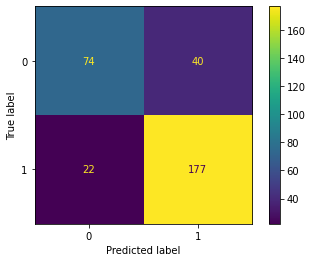

In [22]:
# plotting confusion matrix
plot_confusion_matrix(xg_cl,
                      X_test,
                      y_test,
                      values_format = 'd')